Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Read data and split into train-val

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_df.iloc[:, 0:-2], train_df.iloc[:, -1:], test_size=0.1, random_state = 0)
X_test, y_test = test_df.iloc[:, 0:-2], test_df.iloc[:, -1:]

print(f'Original training data shape: {train_df.shape}, Original Testing data shape: {test_df.shape}')
print(f'Shape of training data after splitting into training-validation ---> training data x: {X_train.shape}, training data y: {y_train.shape}, validation data x: {X_val.shape}, validation data y: {y_test.shape}'
)
print(f'Testing data shape -> test x: {X_test.shape}, test y: {y_test.shape}')

Original training data shape: (7352, 563), Original Testing data shape: (2947, 563)
Shape of training data after splitting into training-validation ---> training data x: (6616, 561), training data y: (6616, 1), validation data x: (736, 561), validation data y: (2947, 1)
Testing data shape -> test x: (2947, 561), test y: (2947, 1)


## Logistic Regression - default

Solver: lbfgs, multiclass -> Multinomial (auto), Regularization: L2, C = 1

Logisitic Regression - Default parameters - Validation set score: 0.9850543478260869, Test set score: 0.9606379368849678
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



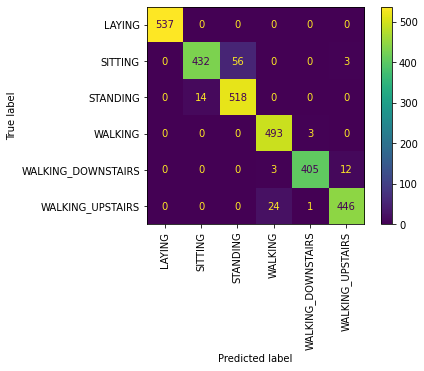

In [4]:
# default parameters
logisticRegr = LogisticRegression(max_iter=1000000)
logisticRegr.fit(X_train, y_train.values.ravel())
val_score = logisticRegr.score(X_val, y_val)
test_score = logisticRegr.score(X_test, y_test)
print(f'Logisitic Regression - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, logisticRegr.predict(X_test)))
metrics.plot_confusion_matrix(logisticRegr, X_test, y_test, values_format='g', xticks_rotation='vertical')

## Logistic Regression - experiments



Logisitic Regression - params: {'C': 0.1, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9741847826086957
Logisitic Regression - params: {'C': 0.25, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9836956521739131
Logisitic Regression - params: {'C': 0.5, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9850543478260869
Logisitic Regression - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9850543478260869
Logisitic Regression - params: {'C': 3, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9877717391304348
Logisitic Regression - params: {'C': 100, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9836956521739131


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Logisitic Regression - params: {'C': 100, 'penalty': 'none', 'multi_class': 'multinomial', 'solver': 'lbfgs'}, Validation set score: 0.9809782608695652
Logisitic Regression - params: {'C': 0.1, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9741847826086957
Logisitic Regression - params: {'C': 0.25, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9755434782608695
Logisitic Regression - params: {'C': 0.5, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9823369565217391
Logisitic Regression - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9850543478260869
Logisitic Regression - params: {'C': 3, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9850543478260869
Logisitic Regression - params: {'C': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.98233695652173

/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Logisitic Regression - params: {'C': 100, 'penalty': 'none', 'multi_class': 'ovr', 'solver': 'lbfgs'}, Validation set score: 0.9782608695652174


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.1, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9741847826086957


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.25, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9755434782608695


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.5, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9836956521739131


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 3, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9823369565217391
Best performing parameters using accuracy: {'C': 3, 'penalty': 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Logisitic Regression - Best parameters - Validation set score: 0.9877717391304348, Test set score: 0.9613165931455717
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



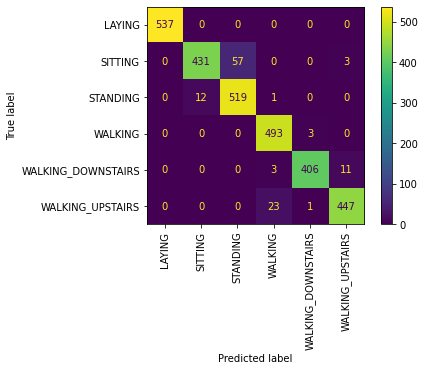

In [5]:
# default parameters

parameters_set = [
    {'C' : .1, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : .25, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : .5, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : 3, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : 100, 'penalty' : 'l2', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    {'C' : 100, 'penalty' : 'none', 'multi_class': 'multinomial', 'solver': 'lbfgs'},
    
    {'C' : .1, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : .25, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : .5, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : 3, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : 100, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    {'C' : 100, 'penalty' : 'none', 'multi_class': 'ovr', 'solver': 'lbfgs'},
    
    
     {'C' : .1, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : .25, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : .5, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 3, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 100, 'penalty' : 'l2', 'multi_class': 'ovr', 'solver': 'liblinear'}
]

best_performace_score = 0
best_performance_params = None
best_performance_model = None

for params in parameters_set:
    logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, n_jobs = -1, 
                                      C=params['C'], penalty = params['penalty'], 
                                      multi_class = params['multi_class'], solver=params['solver'])
    logisticRegr.fit(X_train, y_train.values.ravel())
    score = logisticRegr.score(X_val, y_val)
    if score > best_performace_score:
        best_performace_score = score
        best_performance_params = params
    print(f'Logisitic Regression - params: {params}, Validation set score: {score}')

print(f'Best performing parameters using accuracy: {best_performance_params}')
"""
Running the model on best-accuracy parameters
"""
logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, n_jobs = -1, 
                                      C=best_performance_params['C'], 
                                  penalty = best_performance_params['penalty'], 
                                      multi_class = best_performance_params['multi_class'], 
                                  solver=best_performance_params['solver'])
logisticRegr.fit(X_train, y_train.values.ravel())
val_score = logisticRegr.score(X_val, y_val)
test_score = logisticRegr.score(X_test, y_test)
print(f'Logisitic Regression - Best parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, logisticRegr.predict(X_test)))
metrics.plot_confusion_matrix(logisticRegr, X_test, y_test, values_format='g', xticks_rotation='vertical')

# L1 penalty experiment

/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.1, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.967391304347826


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.25, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9782608695652174


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 0.5, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9836956521739131


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9877717391304348


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 3, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9877717391304348


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logisitic Regression - params: {'C': 100, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}, Validation set score: 0.9809782608695652
Best performing parameters (L1) using accuracy: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}
Logisitic Regression - Best parameters (L1 penalty) - Validation set score: 0.9877717391304348, Test set score: 0.9630132337970818
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


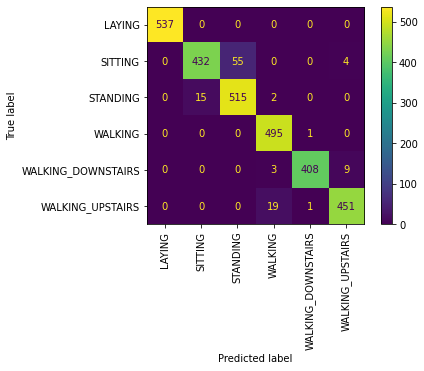

In [7]:
# default parameters

parameters_set = [    
    {'C' : .1, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : .25, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : .5, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 3, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'},
    {'C' : 100, 'penalty' : 'l1', 'multi_class': 'ovr', 'solver': 'liblinear'}    
]

best_performace_score = 0
best_performance_params = None
best_performance_model = None

for params in parameters_set:
    logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, n_jobs = -1, 
                                      C=params['C'], penalty = params['penalty'], 
                                      multi_class = params['multi_class'], solver=params['solver'])
    logisticRegr.fit(X_train, y_train.values.ravel())
    score = logisticRegr.score(X_val, y_val)
    if score > best_performace_score:
        best_performace_score = score
        best_performance_params = params
    print(f'Logisitic Regression - params: {params}, Validation set score: {score}')

print(f'Best performing parameters (L1) using accuracy: {best_performance_params}')
"""
Running the model on best-accuracy parameters
"""
logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, 
                                      C=best_performance_params['C'], 
                                  penalty = best_performance_params['penalty'], 
                                      multi_class = best_performance_params['multi_class'], 
                                  solver=best_performance_params['solver'])
logisticRegr.fit(X_train, y_train.values.ravel())
val_score = logisticRegr.score(X_val, y_val)
test_score = logisticRegr.score(X_test, y_test)
print(f'Logisitic Regression - Best parameters (L1 penalty) - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, logisticRegr.predict(X_test)))
metrics.plot_confusion_matrix(logisticRegr, X_test, y_test, values_format='g', xticks_rotation='vertical')

## PCA followed by Linear Regression

Results - no improvement, but we can get similar results using lesser features

Number of dimensions for variance 0.5 = 1
Logisitic Regression - Default parameters - Validation set score: 0.41983695652173914, Test set score: 0.46623685103495077
Number of dimensions for variance 0.9 = 34
Logisitic Regression - Default parameters - Validation set score: 0.936141304347826, Test set score: 0.9104173736002714
Number of dimensions for variance 0.95 = 67
Logisitic Regression - Default parameters - Validation set score: 0.9619565217391305, Test set score: 0.9416355615880556
Number of dimensions for variance 0.99 = 155
Logisitic Regression - Default parameters - Validation set score: 0.9850543478260869, Test set score: 0.9569053274516457


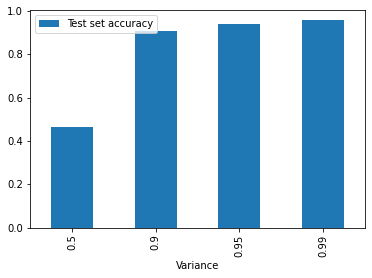

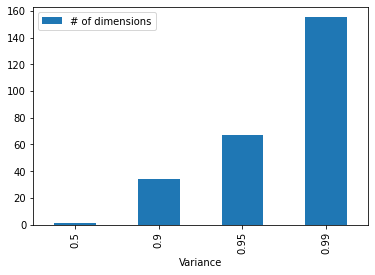

In [56]:
variances = [.5, .9, .95, .99]
components = []
accuracies = []
# pca_performance = 

# Data = {'Country': ['USA','Canada','Germany','UK','France'],
#         'GDP_Per_Capita': [45000,42000,52000,49000,47000]
#        }
  
# df = DataFrame(Data,columns=['Country','GDP_Per_Capita'])
# df.plot(x ='Country', y='GDP_Per_Capita', kind = 'bar')
# plt.show()

for desired_variance in variances:
    pca = PCA(n_components=desired_variance)
    pca = pca.fit(X_train)
    X_train_pca, X_val_pca, X_test_pca = pca.transform(X_train), pca.transform(X_val), pca.transform(X_test)
    print(f'Number of dimensions for variance {desired_variance} = {len(pca.explained_variance_ratio_)}')

    logisticRegr = LogisticRegression(max_iter=1000000)
    logisticRegr.fit(X_train_pca, y_train.values.ravel())
    val_score = logisticRegr.score(X_val_pca, y_val)
    test_score = logisticRegr.score(X_test_pca, y_test)
    print(f'Logisitic Regression - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
    components.append(len(pca.explained_variance_ratio_))
    accuracies.append(test_score)
    
pca_performance_df = pd.DataFrame(
     {
         'Variance': variances,
         '# of dimensions': components,
         'Test set accuracy': accuracies
     }
)
pca_performance_df.plot(x ='Variance', y='Test set accuracy', kind = 'bar')
plt.show()

pca_performance_df.plot(x ='Variance', y='# of dimensions', kind = 'bar')
plt.show()

## Adding weights to classes for logistic regression

Since SITTING class is being misclassified a lot into STANDING, let's try assigning more weight to the SITTING class

Class weighting: [1. 4. 3. 1. 1. 1.] for ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Logisitic Regression - Default parameters - Validation set score: 0.9877717391304348, Test set score: 0.9613165931455717
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Balanced weighting: [0.86824147 0.96302766 0.89212513 0.99698614 1.2334079  1.14265976] for ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS

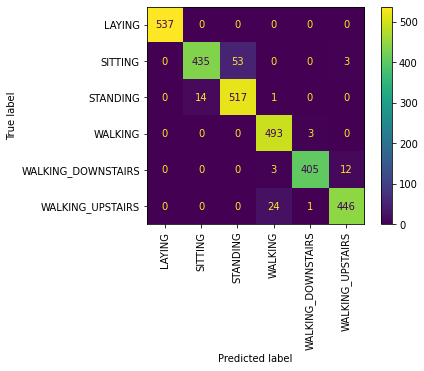

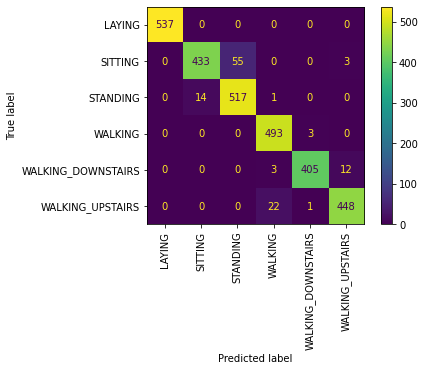

In [86]:
# default parameters
logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, class_weight={'SITTING': 4, 'STANDING': 3})
classess = np.unique(y_train.values.ravel())
weighting = class_weight.compute_class_weight({'SITTING': 4, 'STANDING': 3}, y= y_train.values.ravel(), classes=classess)
print(f'Class weighting: {weighting} for {classess}')
logisticRegr.fit(X_train, y_train.values.ravel())
val_score = logisticRegr.score(X_val, y_val)
test_score = logisticRegr.score(X_test, y_test)
print(f'Logisitic Regression - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, logisticRegr.predict(X_test)))
metrics.plot_confusion_matrix(logisticRegr, X_test, y_test, values_format='g', xticks_rotation='vertical')


"""
Balanced class_weight  - according to number of occurences
"""

# default parameters
logisticRegr = LogisticRegression(max_iter=1000000, random_state=0, class_weight='balanced')
classess = np.unique(y_train.values.ravel())
weighting = class_weight.compute_class_weight('balanced', y= y_train.values.ravel(), classes=classess)
print(f'Balanced weighting: {weighting} for {classess}')
logisticRegr.fit(X_train, y_train.values.ravel())
val_score = logisticRegr.score(X_val, y_val)
test_score = logisticRegr.score(X_test, y_test)
print(f'Logisitic Regression - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, logisticRegr.predict(X_test)))
metrics.plot_confusion_matrix(logisticRegr, X_test, y_test, values_format='g', xticks_rotation='vertical')


# NAIVE BAYES WITH PCA
- Since PCA provides independent features, ideally we expect Naive Bayes to perform somewhat better

Number of dimensions for variance 0.5 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.4388586956521739, Test set score: 0.4696301323379708
Number of dimensions for variance 0.6 = 1
Gaussian Naive Bayes - Default parameters - Validation set score: 0.4388586956521739, Test set score: 0.4696301323379708
Number of dimensions for variance 0.7 = 3
Gaussian Naive Bayes - Default parameters - Validation set score: 0.7391304347826086, Test set score: 0.7485578554462164
Number of dimensions for variance 0.8 = 10
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8695652173913043, Test set score: 0.8408551068883611
Number of dimensions for variance 0.9 = 34
Gaussian Naive Bayes - Default parameters - Validation set score: 0.8953804347826086, Test set score: 0.8713946386155412
Number of dimensions for variance 0.95 = 67
Gaussian Naive Bayes - Default parameters - Validation set score: 0.9089673913043478, Test set score: 0.8744485917882593
Number of dimensio

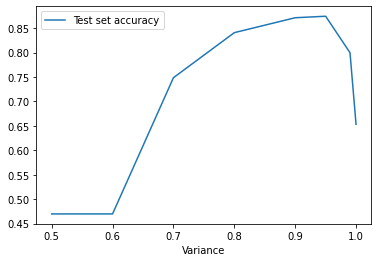

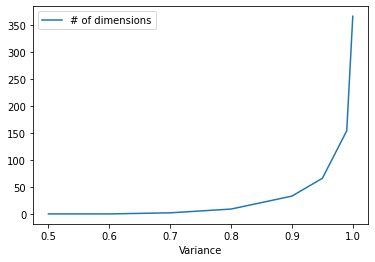

In [101]:
variances = [.5, .6, .70, .80, .9, .95, .99, .9999]
components = []
accuracies = []


for desired_variance in variances:
    pca = PCA(n_components=desired_variance)
    pca = pca.fit(X_train)
    X_train_pca, X_val_pca, X_test_pca = pca.transform(X_train), pca.transform(X_val), pca.transform(X_test)
    print(f'Number of dimensions for variance {desired_variance} = {len(pca.explained_variance_ratio_)}')
    
    naive_bayes = GaussianNB().fit(X_train_pca, y_train.values.ravel())
    val_score = metrics.accuracy_score(y_val.values.ravel(), naive_bayes.predict(X_val_pca))
    test_score = metrics.accuracy_score(y_test.values.ravel(), naive_bayes.predict(X_test_pca))

    print(f'Gaussian Naive Bayes - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
    components.append(len(pca.explained_variance_ratio_))
    accuracies.append(test_score)
    
pca_performance_df = pd.DataFrame(
     {
         'Variance': variances,
         '# of dimensions': components,
         'Test set accuracy': accuracies
     }
)
pca_performance_df.plot(x ='Variance', y='Test set accuracy', kind = 'line')
plt.show()

pca_performance_df.plot(x ='Variance', y='# of dimensions', kind = 'line')
plt.show()